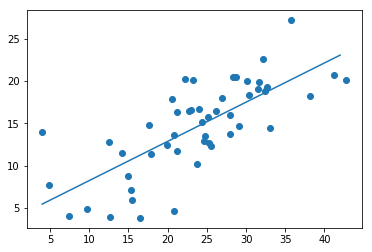

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/18683821/generating-random-correlated-x-and-y-points-using-numpy
def generate_points(n):
  xx = np.array([0, 50.0])
  yy = np.array([0.3, 30.0])
  means = [xx.mean(), yy.mean()]
  stds = [xx.std() / 3, yy.std() / 3]
  corr = np.random.uniform(-1,1)
  covs = [[stds[0]**2, stds[0]*stds[1]*corr],
          [stds[0]*stds[1]*corr, stds[1]**2]]

  m = np.random.multivariate_normal(means, covs, n).T
  plt.scatter(m[0], m[1])
  return m

def hyp_fn(t0,t1,x):  
    return (t0 + t1*x)

def calculate_t0(alpha,m,t0,t1,pts):
    t0 = t0-(alpha*(1.0/m)*sum(hyp_fn(t0,t1,x)-y for x,y in zip(pts[0],pts[1])))
    return t0

def calculate_t1(alpha,m,t0,t1,pts):
    t1 = t1-(alpha*(1.0/m)*sum((hyp_fn(t0,t1,x)-y)*x for x,y in zip(pts[0],pts[1])))
    return t1

# http://www.marcoaltini.com/blog/parameter-estimates-for-regression-least-squares-gradient-descent-and-monte-carlo-methods
def gradient_descent(pts):
    alpha = 0.001
    m = pts.shape[1]
    t0 = 0
    t1 = 0
    for i in xrange(100000):
        t0 = calculate_t0(alpha,m,t0,t1,pts)
        t1 = calculate_t1(alpha,m,t0,t1,pts)
    
    graph(t0, t1, 't0+(t1*x)', range(int(min(np.floor(pts[0]))), int(max(np.ceil(pts[0])))))

# https://stackoverflow.com/questions/14000595/graphing-an-equation-with-matplotlib
def graph(t0, t1, formula, x_range):
    x = np.array(x_range)
    y = eval(formula)
    plt.plot(x,y)
    plt.show()

pts = generate_points(50)
gradient_descent(pts)